In [1]:
import matplotlib.pyplot as plt

import math
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.cluster import KMeans

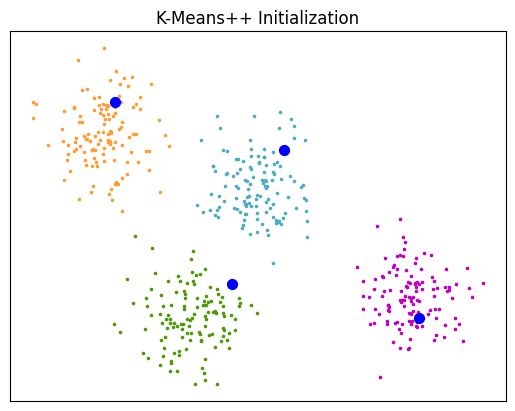

In [2]:

# Generate sample data
n_samples = 500
n_components = 4
seed = 0

blobs, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=seed
)
blobs = blobs[:, ::-1]

# Calculate seeds from k-means++
centers_init, indices = kmeans_plusplus(blobs, n_clusters=4, random_state=seed)

# Plot init seeds along side sample data
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(blobs[cluster_data, 0], blobs[cluster_data, 1], c=col, marker=".", s=10)

plt.scatter(centers_init[:, 0], centers_init[:, 1], c="b", s=50)
plt.title("K-Means++ Initialization")
plt.xticks([])
plt.yticks([])
plt.show()

In [3]:
noisy_moons, y = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)


In [4]:
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)

In [5]:
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

In [6]:
def similarity (x1, x2, omega):
    return math.pow(math.e, (-math.pow(norm(x1-x2), 2))/(2*(omega**2)))

In [7]:
def spectral_clustering(data, clusters, omega):
        
    # similarity & diagonal matrices 
    
    sim_matrix = np.empty([len(data), len(data)])
    diag_matrix = np.empty([len(data), len(data)])
    
    # making the similarlty & diagonal matrices
    
    for i in range (len(data)):
        for j in range (len(data)):
            sim_matrix[i, j] = similarity(data[j], data[i], omega)
        diag_matrix [i, i] = sum(sim_matrix[i])
    
    eigh = np.linalg.eigh(diag_matrix - sim_matrix)
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(eigh[1][:, 0:clusters])
    
    # plot the data
    
    plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_)
    plt.show() 
    return kmeans.labels_

C:\Users\Ben\AppData\Local\anaconda3\envs\tf2.yml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ben\AppData\Local\anaconda3\envs\tf2.yml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


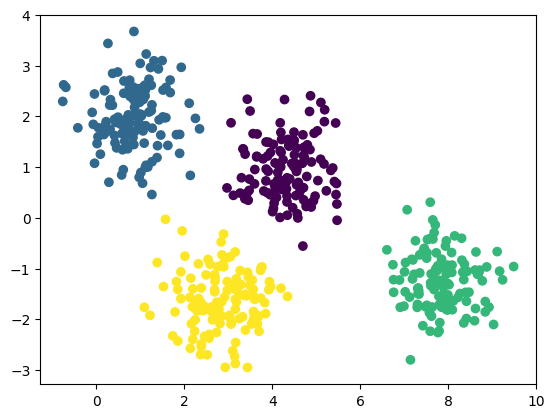

In [8]:
blobs_labels = spectral_clustering(blobs, 4, 1)

C:\Users\Ben\AppData\Local\anaconda3\envs\tf2.yml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ben\AppData\Local\anaconda3\envs\tf2.yml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


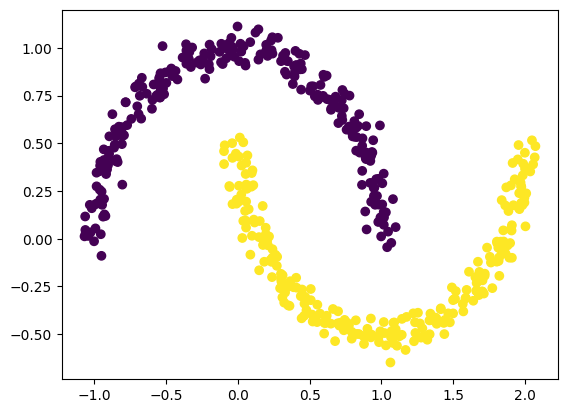

In [9]:
noisy_moons_labels = spectral_clustering(noisy_moons, 2, 0.1)

C:\Users\Ben\AppData\Local\anaconda3\envs\tf2.yml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ben\AppData\Local\anaconda3\envs\tf2.yml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


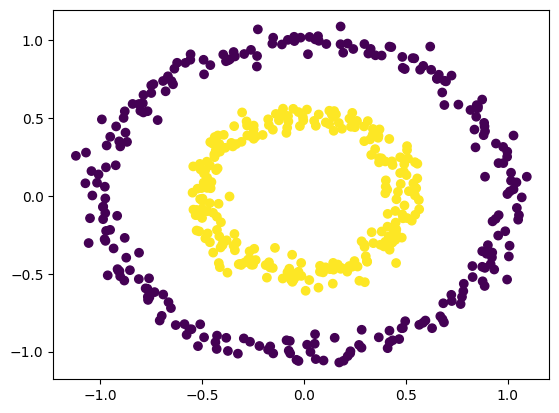

In [10]:
noisy_circles_labels = spectral_clustering(noisy_circles[0], 2, 0.1)

C:\Users\Ben\AppData\Local\anaconda3\envs\tf2.yml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ben\AppData\Local\anaconda3\envs\tf2.yml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


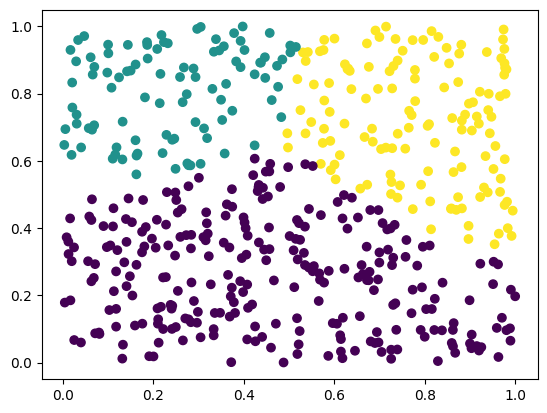

In [11]:
no_structure_labels = spectral_clustering(no_structure[0], 3, 0.1)

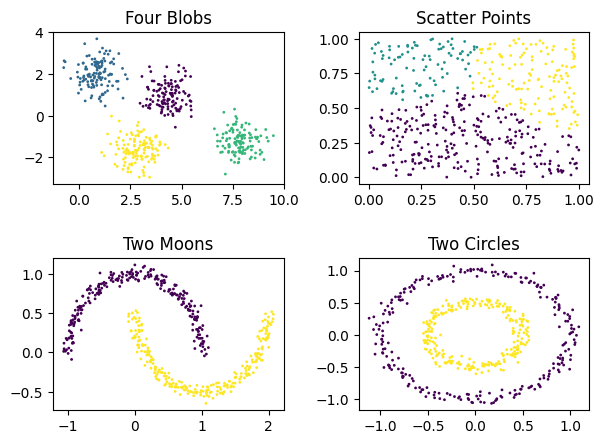

In [12]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].scatter(blobs[:, 0], blobs[:, 1], c = blobs_labels, s = 1) #row=0, col=0
ax[1, 0].scatter(noisy_moons[:, 0], noisy_moons[:, 1], c = noisy_moons_labels, s = 1) #row=1, col=0
ax[0, 1].scatter(no_structure[0][:, 0], no_structure[0][:, 1], c = no_structure_labels, s = 1) #row=0, col=1
ax[1, 1].scatter(noisy_circles[0][:, 0], noisy_circles[0][:, 1], c = noisy_circles_labels, s = 1) #row=1, col=1

# set titles

ax[0, 0].title.set_text('Four Blobs')
ax[1, 0].title.set_text('Two Moons')
ax[0, 1].title.set_text('Scatter Points')
ax[1, 1].title.set_text('Two Circles')

fig.tight_layout(pad=2.0)

plt.savefig('clustering_data.png')
plt.show()
